### ML Linear Regression
* Predict Canada per Capita income

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

#### Import Data and Perform EDA

In [3]:
# Read CSV
df = pd.read_csv("../DATASET/canada_per_capita.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
# Check dimension
df.shape

(47, 2)

In [5]:
# Check column names
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [6]:
# Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [7]:
# Check Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,47.0,1993.000000,13.711309,1970.000000,1981.500000,1993.00000,2004.50000,2016.00000
per capita income (US$),47.0,18920.137063,12034.679438,3399.299037,9526.914515,16426.72548,27458.60142,42676.46837


In [8]:
# Check for Null Values
df.isna().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [9]:
# Check for duplicated values
df.loc[df.duplicated(subset=['year','per capita income (US$)'])]

,year,per capita income (US$)


<Axes: xlabel='year'>

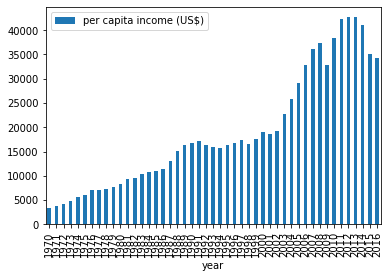

In [134]:
# Make plot
ax = df.plot.bar(x='year',y='per capita income (US$)')
ax

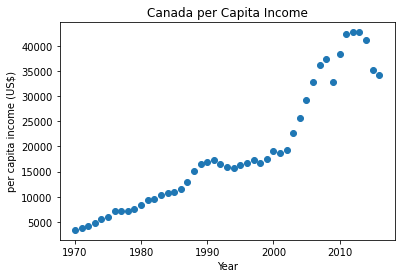

In [135]:
plt.scatter(x=df['year'],y=df['per capita income (US$)'])
plt.title("Canada per Capita Income")
plt.xlabel("Year")
plt.ylabel("per capita income (US$)")
plt.show()

In [10]:
# Correlation
df.corr().T

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


##### Apply ML Regression Model
* Split Dataset to X & Y
* Split Dataset for Model Train & Test

In [11]:
# View dataset
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [14]:
# Split dataset
X=df.iloc[:,:1].values
Y=df.iloc[:,1].values

In [16]:
print(Y)

[ 3399.299037  3768.297935  4251.175484  4804.463248  5576.514583
  5998.144346  7062.131392  7100.12617   7247.967035  7602.912681
  8355.96812   9434.390652  9619.438377 10416.53659  10790.32872
 11018.95585  11482.89153  12974.80662  15080.28345  16426.72548
 16838.6732   17266.09769  16412.08309  15875.58673  15755.82027
 16369.31725  16699.82668  17310.75775  16622.67187  17581.02414
 18987.38241  18601.39724  19232.17556  22739.42628  25719.14715
 29198.05569  32738.2629   36144.48122  37446.48609  32755.17682
 38420.52289  42334.71121  42665.25597  42676.46837  41039.8936
 35175.18898  34229.19363 ]


In [17]:
# split X & Y dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

###### Creating a Linear Regression Model
Using y=mx+c

In [18]:
# Instantiate the LinearRegression and train the model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [19]:
# The model returns a the (coefficient or slope) and the (intercept)
print("Coefficient",regression.coef_)
print("Intercept", regression.intercept_)

Coefficient [838.48247458]
Intercept -1651800.0965383372


##### The Coefficient and Intercept can then be substituted into the equation
y = mx + c
* y = (838.482)* (Year) + (-1651800.096)

In [164]:
# predicting with the trained model
y_predict = regression.predict(x_test)

In [165]:
print("Predicted Y",y_predict)
print("Actual Y",y_test)

Predicted Y [23487.88766587 27680.30003875 25164.85261502  3364.30827603
 15103.0629201   9233.68559806 35226.64230994 26003.3350896
 18456.99281841  8395.20312349]
Actual Y [16622.67187  22739.42628  18987.38241   5576.514583 15080.28345
  9434.390652 42665.25597  18601.39724  16412.08309   8355.96812 ]


In [145]:
# Comparing the values the 
predict_df = pd.DataFrame({
    "Predicted Y": y_predict,
    "Actual Y": y_test
}, columns=["Predicted Y", "Actual Y"])
predict_df

,Predicted Y,Actual Y
0,23487.887666,16622.671870
1,27680.300039,22739.426280
2,25164.852615,18987.382410
3,3364.308276,5576.514583
4,15103.062920,15080.283450
5,9233.685598,9434.390652
6,35226.642310,42665.255970
7,26003.335090,18601.397240
8,18456.992818,16412.083090
9,8395.203123,8355.968120


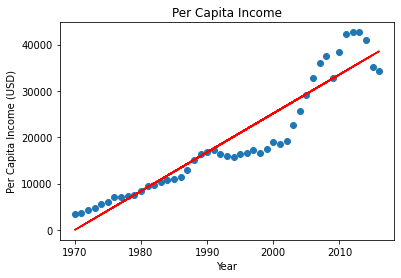

In [146]:
# Plot the x_test and y_predict
plt.plot(x_train,regression.predict(x_train),color='red')
plt.scatter(x=df['year'],y=df['per capita income (US$)'])
plt.title('Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.show()

### Model Evaluation Metrics
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* R Squared Score

In [148]:
# Mean Absolute Error
mean_abs_error = mean_absolute_error(y_test,y_predict)
print("Mean Absolute Error",mean_abs_error)

Mean Absolute Error 3734.394683220244


In [149]:
# Mean Squared Error
mean_sqr_error = mean_squared_error(y_test,y_predict)
print("Mean Squared Error",mean_sqr_error)

Mean Squared Error 22894407.002098337


In [150]:
# Root Mean Squared Error
root_mean_sqr_error = np.sqrt(mean_sqr_error)
print("Root Mean Squared Error",root_mean_sqr_error)

Root Mean Squared Error 4784.810027796123


In [151]:
# R Squared Score
SSR = sum((y_test - y_predict)**2)
SSM = sum((y_test - y_test.mean())**2)
r_squared = 1 - SSR/SSM
print("R Squared",r_squared)

R Squared 0.7622063756926367


In [154]:
# using the inbuilt r-squared score method
r2 = r2_score(y_test,y_predict)
print("R2",r2)

R2 0.7622063756926367


In [168]:
# using regression score
train_score = regression.score(x_train,y_train)
test_score = regression.score(x_test,y_test)
print("The Coefficient of determinant for train score: ",train_score)
print("The Coefficient of determinant for test score: ",test_score)

The Coefficient of determinant for train score:  0.9109145155451552
The Coefficient of determinant for test score:  0.7622063756926367


##### Prediction

In [167]:
pred = regression.predict([[2027]])
pred

array([47803.87942859])